In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('data/playoff_per_game_2013-22.csv')
pred_data = pd.read_csv('data/team_per_game_2023.csv')
data

,Unnamed: 0,Team,Year,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Attend.,Attend./G,Playoff_W,Payroll,Adjusted Payroll
0,0,Denver Nuggets,2013,40.7,85.2,0.478,6.4,18.5,0.343,34.4,...,0.216,0.493,14.3,71.8,0.193,730616.0,17820.0,2.0,63444254,172431.041284
1,1,Houston Rockets,2013,38.1,82.7,0.461,10.6,28.9,0.366,27.5,...,0.232,0.502,13.5,75.2,0.196,683564.0,16672.0,2.0,48048265,130587.276916
2,2,Oklahoma City Thunder,2013,38.1,79.3,0.481,7.3,19.4,0.377,30.8,...,0.280,0.469,13.5,73.4,0.197,746323.0,18203.0,5.0,68924100,187324.360888
3,3,San Antonio Spurs,2013,39.1,81.4,0.481,8.1,21.5,0.376,31.1,...,0.204,0.480,13.7,74.9,0.179,755700.0,18432.0,15.0,69838600,189809.821387
4,4,Miami Heat,2013,38.4,77.4,0.496,8.7,22.1,0.396,29.6,...,0.224,0.487,14.8,73.0,0.200,819290.0,19983.0,16.0,80427933,218589.885784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,150,Golden State Warriors,2022,40.5,86.4,0.469,14.3,39.4,0.364,26.2,...,0.181,0.509,13.0,78.7,0.201,740624.0,18064.0,16.0,178980766,349607.695551
151,151,Miami Heat,2022,39.6,84.8,0.467,13.6,35.8,0.379,26.0,...,0.204,0.524,13.8,78.0,0.209,804761.0,19628.0,11.0,140840240,275106.833252
152,152,Philadelphia 76ers,2022,39.4,84.5,0.466,11.6,31.8,0.364,27.8,...,0.232,0.524,12.1,76.8,0.192,846867.0,20655.0,6.0,148922969,290895.033976
153,153,Toronto Raptors,2022,40.6,91.3,0.445,11.9,34.2,0.349,28.7,...,0.177,0.535,14.4,75.6,0.199,547343.0,13350.0,2.0,134896484,263496.743047


In [3]:
corr = data.corr().abs()
corr = corr.loc[corr['Playoff_W']>.25]
corr.index
variables = list(corr.index)

<AxesSubplot:title={'center':'Correlation between Filtered Variables'}>

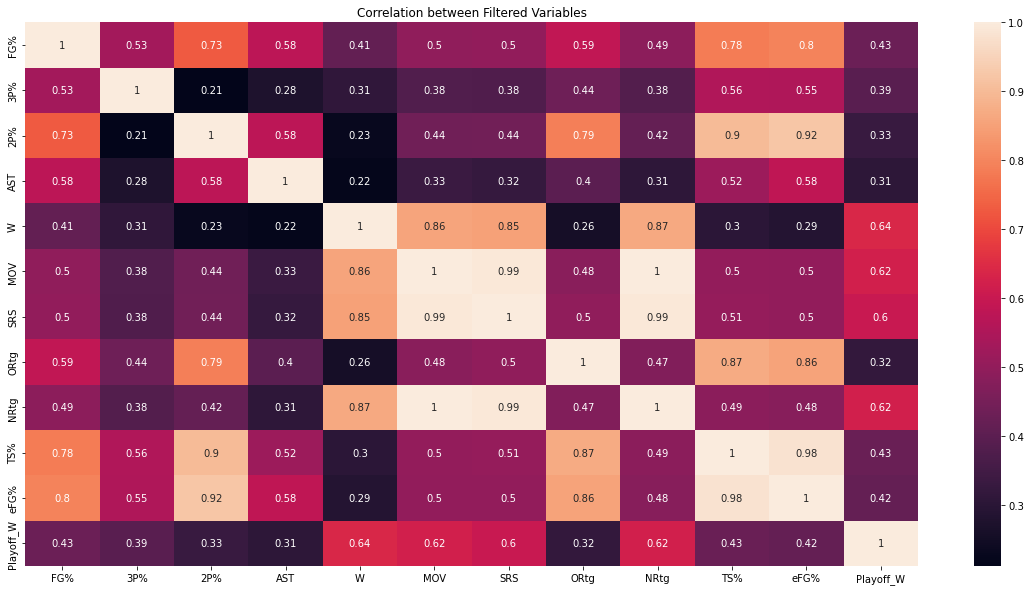

In [4]:
plt.figure(figsize=(20,10))
plt.title("Correlation between Filtered Variables")
sns.heatmap(data=data[variables].corr(), annot=True)

In [5]:
corr_pay = data['Playoff_W'].corr(data['Adjusted Payroll'])
corr_wins = data['W'].corr(data['Adjusted Payroll'])

print(f'Correlation between playoff wins and payrolls: {corr_pay}')
print(f'Correlation between regular season wins and payrolls: {corr_wins}')

Correlation between playoff wins and payrolls: 0.1314894673790181
Correlation between regular season wins and payrolls: -0.02095894928149344


In [6]:
remove = ['MOV','Adjusted Payroll']
variables = [item for item in variables if item not in remove]
variables

['FG%',
 '3P%',
 '2P%',
 'AST',
 'W',
 'SRS',
 'ORtg',
 'NRtg',
 'TS%',
 'eFG%',
 'Playoff_W']

In [7]:
X = data[variables].drop('Playoff_W',1)
Y = data['Playoff_W']

pred_X = pred_data[variables].drop('Playoff_W',1)

X.head()

C:\Users\whisk\AppData\Local\Temp\ipykernel_20996\929663138.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data[variables].drop('Playoff_W',1)
C:\Users\whisk\AppData\Local\Temp\ipykernel_20996\929663138.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pred_X = pred_data[variables].drop('Playoff_W',1)


,FG%,3P%,2P%,AST,W,SRS,ORtg,NRtg,TS%,eFG%
0,0.478,0.343,0.516,24.4,57.0,5.37,110.4,5.3,0.549,0.515
1,0.461,0.366,0.511,23.2,45.0,3.69,109.7,3.6,0.564,0.525
2,0.481,0.377,0.514,21.4,60.0,9.15,112.4,9.8,0.580,0.527
3,0.481,0.376,0.519,25.1,58.0,6.67,108.3,6.7,0.568,0.531
4,0.496,0.396,0.536,23.0,66.0,7.03,112.3,8.6,0.588,0.552


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
model = LinearRegression().fit(X_train, Y_train)
model_predicted_wins = model.predict(X_test)

In [9]:
# explore model performance
print('Coefficients: ', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared erorr: %.2f' 
    % mean_squared_error(Y_test, model_predicted_wins))
print('Coefficient of determination (R^2): %.2f' 
    % r2_score(Y_test, model_predicted_wins))

Coefficients:  [-3.35451468e+01  2.31534688e+01  1.90552074e+00  4.05713773e-02
  3.28400963e-01 -1.46516634e+00 -1.75013075e-01  1.59926192e+00
 -1.49650805e+01  8.84234125e+01]
Intercept: -25.08929968353095
Mean squared erorr: 12.88
Coefficient of determination (R^2): 0.42


c:\Users\whisk\miniconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Playoff_W'>

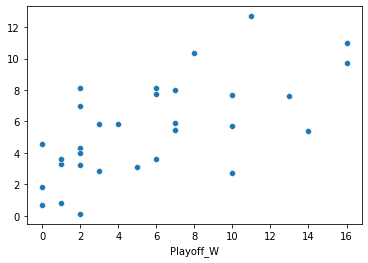

In [10]:
# scatter plot
sns.scatterplot(Y_test, model_predicted_wins)

In [11]:
model_predicted_wins = model.predict(pred_X)

w_min, w_max = min(model_predicted_wins), max(model_predicted_wins)
for i, win in enumerate(model_predicted_wins):
    model_predicted_wins[i] = (win-w_min) / (w_max - w_min)

model_predicted_wins

array([0.96179389, 0.65605886, 0.76729689, 0.79954709, 0.59859964,
       0.97582383, 0.36381233, 0.47077511, 0.63467825, 0.65152875,
       0.39513206, 1.        , 0.56078639, 0.3854773 , 0.54161759,
       0.61698264, 0.70204821, 0.77404803, 0.83936404, 0.67994965,
       0.38963201, 0.01482254, 0.19547179, 0.84630916, 0.        ,
       0.12795505, 0.3169477 , 0.80098577, 0.00757186, 0.58373548])

In [12]:
model_predicted_wins_df = pred_data[['Team','Playoff_W']]
 
for i in range(30):
    model_predicted_wins_df.loc[i, 'Playoff_W'] = model_predicted_wins[i]

model_predicted_wins_df = model_predicted_wins_df.sort_values(by='Playoff_W',ascending=False).reset_index(drop=True)
model_predicted_wins_df = model_predicted_wins_df.rename(columns={'Playoff_W': 'Predicted Playoff Rating'})
model_predicted_wins_df

C:\Users\whisk\AppData\Local\Temp\ipykernel_20996\3449410057.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_predicted_wins_df.loc[i, 'Playoff_W'] = model_predicted_wins[i]


,Team,Predicted Playoff Rating
0,Brooklyn Nets,1.000000
1,Denver Nuggets,0.975824
2,Boston Celtics,0.961794
3,Cleveland Cavaliers,0.846309
4,Philadelphia 76ers,0.839364
5,Los Angeles Clippers,0.800986
6,Golden State Warriors,0.799547
7,Dallas Mavericks,0.774048
8,New Orleans Pelicans,0.767297
9,Portland Trail Blazers,0.702048


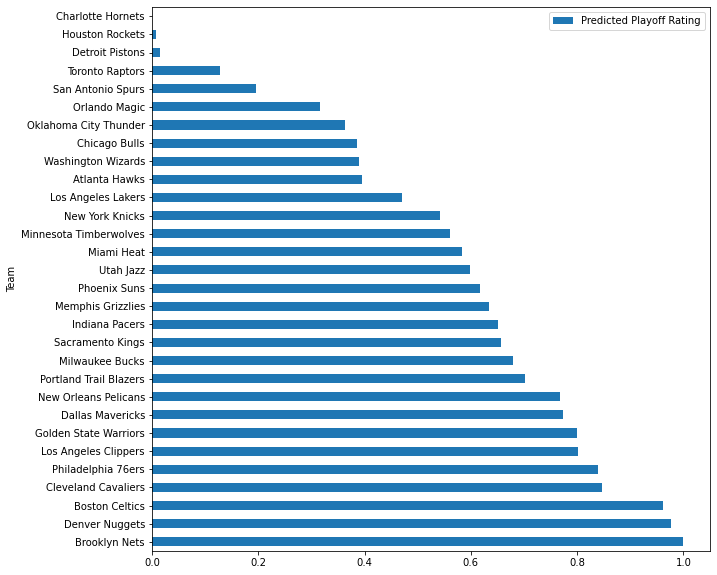

In [18]:
ax = model_predicted_wins_df.plot.barh(x='Team', y='Predicted Playoff Rating', figsize=(10,10))

In [20]:
fig = ax.get_figure()
fig.savefig('C:/Users/whisk/OneDrive/Documents/Bristol/Economics/Year 4/Data Science/slblundell.github.io/nba_project/figures/win_rating_bar.jpeg')